In [53]:
#~~Starting: Join all datasets
import pandas as pd
import numpy as np
import re

#~~Filter all warnings.
import warnings
warnings.filterwarnings('ignore')
#~~Read in all the Energy data and clean some country names
Energy = pd.read_excel('Energy Indicators.xls',header=None,skiprows = 18, skipfooter = 38)
Energy.rename(columns={2:'Country',3:'Energy Supply',4:'Energy Supply per Capita',5:'% Renewable'},inplace=True)
Energy.drop([0,1],axis=1,inplace=True)
#~~Clean country names
Energy['Country']=Energy['Country'].str.replace('\d+','')
Energy['Country']=Energy['Country'].str.replace('\(.+\)','')
Energy['Country']=Energy['Country'].str.replace(r' $','') #can likely use rstrip here too
Energy['Country'].replace({"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"},inplace=True)
#~~Convert Energy Supply to gigajoules and get rid of '...' values
Energy['Energy Supply']=pd.to_numeric(Energy['Energy Supply'],errors='coerce')
Energy['Energy Supply per Capita']=pd.to_numeric(Energy['Energy Supply per Capita'],errors='coerce')
Energy['Energy Supply']=Energy['Energy Supply']*1000000
#~~~can also do energy[column to fix].replace('...',np.nan)
# print(Energy.head())

#~~Read in the GDP data and clean some country names
GDP = pd.read_csv('world_bank.csv',skiprows = 4)
GDP.rename(columns={'Country Name':'Country'},inplace=True)
GDP['Country'].replace({"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"},inplace=True)
# print(GDP.head())

#~~Read in the journalism data
ScimEn = pd.read_excel('scimagojr-3.xlsx')
# print(ScimEn.head())
print(Energy.shape)
print(GDP.shape)
print(ScimEn.shape)

(227, 4)
(264, 60)
(191, 8)


In [54]:
#~~Step 1: Pull the top 15 journalism ranked countries
df1=ScimEn.set_index('Country').join(Energy.set_index('Country'),how='inner',on='Country').join(GDP.set_index('Country'),how='inner',on='Country')
# print(df1.head())
lst=['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
df=df1[lst]
df2=df[df['Rank']<=15]
def answer_one():
    return df2
    raise NotImplementedError()
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [55]:
#~~Step 2: How many rows were lost to the inner join?
dfall=ScimEn.set_index('Country').join(Energy.set_index('Country'),how='outer',on='Country').join(GDP.set_index('Country'),how='outer',on='Country')
# dfall=ScimEn.merge(Energy,how='outer',on='Country').merge(GDP,how='outer',on='Country')

print(len(pd.concat([ScimEn['Country'],Energy['Country'],GDP['Country']]).unique())) #this is the same thing as outer joining all dataframes on 'Country'
def answer_two():
    return dfall.shape[0]-df.shape[0]
    raise NotImplementedError()
answer_two()
#~~Weird, this printed out 156 in the Assignment to get the answer right. I think there's a difference in the XLSX reading software that I'm using where perhaps the formatting is slightly different?

319


158

In [57]:
#~~Step 3 - find the top 15 average GDP countries over the last 10 years
asd = answer_one()
col=asd.loc[:,'2006':'2015']
asd['avgGDP']=col.mean(axis=1)
def answer_three():
    return asd['avgGDP'].sort_values(ascending=False).head(15)
    raise NotImplementedError()
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [59]:
#~~Step 4 - find how much the GDP has changed over the last 10 years for the 6th largest GDP country
sod = answer_three()[[5]]
print(sod)
sod2=GDP.set_index('Country').join(sod,how='inner',on='Country')
sod2.reset_index(inplace=True)
#~~~ Could also use DF[DF] to pull out desired value rather than doing join
# print(sod2)
def answer_four():
    return sod2['2015'][0]-sod2['2006'][0]
    raise NotImplementedError()
answer_four()

Country
United Kingdom    2.487907e+12
Name: avgGDP, dtype: float64


246702696075.3999

In [9]:
#~~Step 5 - pull mean energy supply per capita
sda = answer_one()['Energy Supply per Capita']
# print(sda)
def answer_five():
    return sda.mean()
    raise NotImplementedError()
answer_five()

157.6

In [60]:
#~~Step 6 - find the country with the max renewable % and print that as well
sda6 = answer_one()['% Renewable']
def answer_six():
    return (sda6.idxmax(),sda6.max())
    raise NotImplementedError()
answer_six()

('Brazil', 69.64803)

In [61]:
#~~Step 7 - Find the ratio of self-citations to total citations and find the country with the max and its max
dasd7 = answer_one()
dasd7['Citation_Ratio']=dasd7['Self-citations']/dasd7['Citations']
# print(dasd7.shape)
def answer_seven():
    return(dasd7.iloc[:,21].idxmax(),dasd7.iloc[:,21].max())
    raise NotImplementedError()
answer_seven()

('China', 0.6893126179389422)

In [63]:
#~~Step 8 - pull the 3rd most populous country
asd8 = answer_one()
asd8['PopulationEst']=asd8['Energy Supply']/asd8['Energy Supply per Capita']
asd8.sort_values(by='PopulationEst',ascending=False,inplace=True)
def answer_eight():
    return asd8.index[2]
    raise NotImplementedError()
answer_eight()

'United States'

0.7940010435442945


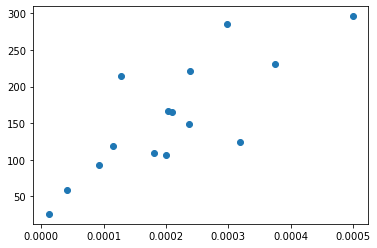

In [69]:
#~~Correlate the number of citable documents pr capita with the energy supply per capita
asd9=answer_one().reset_index()
asd9['PopulationEst']=asd9['Energy Supply']/asd9['Energy Supply per Capita']
asd9['DocPerPerson']=asd9['Citable documents']/asd9['PopulationEst']
asd9a = asd9[['Energy Supply per Capita','DocPerPerson']]
# print(asd9a)
def answer_nine():
    #not sure why but have to convert these to type float64 before corr works
    return asd9a['Energy Supply per Capita'].astype('float64').corr(asd9a['DocPerPerson'].astype('float64'),method='pearson')
    raise NotImplementedError()
print(answer_nine())


# plot9()
Top15 = answer_one()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(Top15['Citable docs per Capita'],Top15['Energy Supply per Capita'])
plt.show()
# plt.xlim(0, 0.0006)

In [71]:
#~~Mark countries with a Renewable% above (1) or below (2) the median
asd10 = answer_one().sort_values(by='Rank')
asd10['MedRen']=asd10['% Renewable'].median()
# temp = {True:1,False:0}
asd10['HighRenew']=np.where(asd10['% Renewable']>=asd10['MedRen'],1,0)

def answer_ten():
    return asd10['HighRenew']
    raise NotImplementedError()
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32

In [84]:
#~~Step 11: Group on continent and give descriptive statistics on population
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
asd11 = answer_one().reset_index()
asd11['Continent']=asd11['Country'].map(ContinentDict)
asd11=asd11[['Continent','PopulationEst']]
asd11['PopulationEst']=asd11['PopulationEst'].astype('float64')
# print(asd11)
asd11=asd11[['Continent','PopulationEst']]
# asd11.groupby('Continent').agg({'PopulationEst':['size','sum','mean','std']})
def answer_eleven():
    #~~This worked in Coursera but doesn't work here for some reason
    #return asd11.groupby('Continent')['PopulationEst'].agg({'size':np.size,'sum':np.sum,'mean':np.mean,'std':np.std})
    return asd11.groupby('Continent')['PopulationEst'].agg([np.size,np.sum,np.mean,np.std])
    raise NotImplementedError()
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [96]:
#~~Step 12: Cut % Renewable into 5 bins and group countries
asd12 = answer_one().reset_index()
asd12['Continent']=asd12['Country'].map(ContinentDict)
asd12['bins']=pd.cut(asd12['% Renewable'],5)
# print(asd12)
def answer_twelve():
    result= asd12.groupby(['Continent','bins']).size()
    #~~^This worked in Coursera to print out as it was but had to modify a bit here
    return result[result>0]
    raise NotImplementedError()
answer_twelve()

Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [98]:
#~~Convert population to a string with comma separators
asd13=answer_one().sort_values(by='Rank')
asd13['PopStr']=(asd13['Energy Supply']/asd13['Energy Supply per Capita']).astype('float64')
asd13a=asd13
# print(asd13a)
asd13a['PopEst']=asd13a['PopStr'].map('{:,}'.format)

def answer_thirteen():
    return asd13a['PopEst']
    raise NotImplementedError()
answer_thirteen()

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       889

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


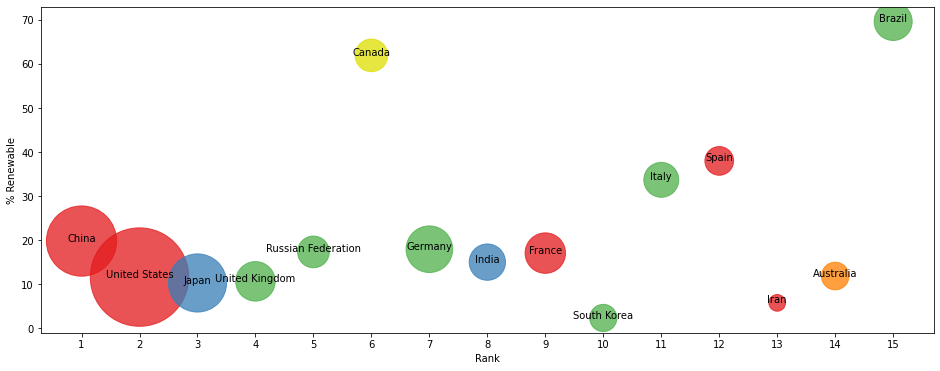

In [99]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
plot_optional()